In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn
seaborn.set(style='whitegrid')


In [239]:
df = pd.read_csv("P3_Flint_Flat_File.csv", encoding="ISO-8859–1")


In [240]:
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y')


In [241]:
df

,Date,P3_sap_draw,P3_actual_draw,P3_pack,P3_eff,P3_seed,Total Cullet %,Melting cost-Rs/ton/Draw,Barrier Boosting (kWh),Capacitive Boosting (kWh),...,TiO2,Name,FGCode,Draw,Defect Type,Defect Count,Sample Size,Pack to Melt Ratio,Density (g/cm3)_y,Color
0,2021-12-14,29.05,29.1,23.99,82.6,44,30,10395,4780,30612,...,0.041,200G MTO MD SAUCE,F3W0100QMNQ110000X,33,NaN,NaN,NaN,0.824399,NaN,Flint
1,2021-12-15,30.40,30.4,27.31,89.8,32,30,10291,5551,30410,...,0.041,200G MTO MD SAUCE,F3W0100QMNQ110000X,33,NaN,NaN,NaN,0.898355,2.524000,Flint
2,2021-12-16,27.64,27.6,20.10,72.7,47,30,10393,5989,30410,...,0.041,150G MD Jam Jar,F3W0243QMNQ110000X,27,NaN,NaN,NaN,0.728261,2.523400,Flint
3,2021-12-19,26.52,26.5,16.31,61.5,45,30,10359,6346,31047,...,0.041,150ML JARï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,F3W0244QRQQ110000X,26,NaN,NaN,NaN,0.615472,2.521967,Flint
4,2021-12-20,30.41,29.9,23.35,78.1,56,30,10242,6324,31475,...,0.041,250ML KIST JAM JAR -DS80,F3X0086QMQQ110000X,35,NaN,NaN,NaN,0.780936,2.522400,Flint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-02-24,33.41,29.7,24.44,82.4,58,30,10274,7408,30940,...,0.035,250G TT JAM JAR (SHIRNK) -DS2640,F3X0060QMPQ110000X,33,NaN,NaN,NaN,0.822896,2.521300,Flint
57,2022-02-25,32.68,32.4,28.55,88.2,57,30,10201,6500,31157,...,0.035,250G TT JAM JAR (SHIRNK) -DS2640,F3X0060QMPQ110000X,33,NaN,NaN,NaN,0.881173,2.521000,Flint
58,2022-02-26,32.45,32.2,26.78,83.3,58,30,10206,6788,31575,...,0.035,250G TT JAM JAR (SHIRNK PAL) -DS2640,F3X0060QMPQ110002X,33,NaN,NaN,NaN,0.831677,2.521400,Flint
59,2022-02-27,32.54,32.2,26.88,83.4,63,32,10233,6154,27682,...,0.035,250G TT JAM JAR (SHIRNK PAL) -DS2640,F3X0060QMPQ110002X,33,NaN,NaN,NaN,0.834783,2.520633,Flint


In [243]:
df.describe()["P3_eff"]

count    61.000000
mean     79.378689
std      10.142783
min      46.100000
25%      75.800000
50%      82.400000
75%      85.300000
max      94.800000
Name: P3_eff, dtype: float64

In [244]:
df["Type"] = ""*len(df)

In [245]:
c1 = df.index[(df["P3_eff"] <= 76)]
c2 = df.index[(df["P3_eff"] >= 76) &
              (df["P3_eff"] <= 82)]
c3 = df.index[(df["P3_eff"] >= 82) & (df["P3_eff"] <= 85)]
c4 = df.index[(df["P3_eff"] >= 85) &
              (df["P3_eff"] <= 95)]

c1, c2, c3, c4


(Int64Index([2, 3, 6, 7, 25, 26, 28, 31, 32, 33, 34, 35, 50, 51, 52, 53, 54], dtype='int64'),
 Int64Index([4, 8, 19, 21, 27, 36, 38, 39, 40, 41, 42, 48], dtype='int64'),
 Int64Index([0, 14, 15, 16, 17, 37, 43, 44, 45, 46, 47, 56, 58, 59, 60], dtype='int64'),
 Int64Index([1, 5, 9, 10, 11, 12, 13, 18, 20, 22, 23, 24, 29, 30, 49, 55, 57], dtype='int64'))

In [246]:
df.loc[c1, "Type"] = "[46, 76]"
df.loc[c2, "Type"] = "[76, 82]"
df.loc[c3, "Type"] = "[82, 85]"
df.loc[c4, "Type"] = "[85, 95]"

In [247]:
df1 = df.rename(columns = {"Type":"DPR_Eff_Metric"})

In [248]:
df1

,Date,P3_sap_draw,P3_actual_draw,P3_pack,P3_eff,P3_seed,Total Cullet %,Melting cost-Rs/ton/Draw,Barrier Boosting (kWh),Capacitive Boosting (kWh),...,Name,FGCode,Draw,Defect Type,Defect Count,Sample Size,Pack to Melt Ratio,Density (g/cm3)_y,Color,DPR_Eff_Metric
0,2021-12-14,29.05,29.1,23.99,82.6,44,30,10395,4780,30612,...,200G MTO MD SAUCE,F3W0100QMNQ110000X,33,NaN,NaN,NaN,0.824399,NaN,Flint,"[82, 85]"
1,2021-12-15,30.40,30.4,27.31,89.8,32,30,10291,5551,30410,...,200G MTO MD SAUCE,F3W0100QMNQ110000X,33,NaN,NaN,NaN,0.898355,2.524000,Flint,"[85, 95]"
2,2021-12-16,27.64,27.6,20.10,72.7,47,30,10393,5989,30410,...,150G MD Jam Jar,F3W0243QMNQ110000X,27,NaN,NaN,NaN,0.728261,2.523400,Flint,"[46, 76]"
3,2021-12-19,26.52,26.5,16.31,61.5,45,30,10359,6346,31047,...,150ML JARï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,F3W0244QRQQ110000X,26,NaN,NaN,NaN,0.615472,2.521967,Flint,"[46, 76]"
4,2021-12-20,30.41,29.9,23.35,78.1,56,30,10242,6324,31475,...,250ML KIST JAM JAR -DS80,F3X0086QMQQ110000X,35,NaN,NaN,NaN,0.780936,2.522400,Flint,"[76, 82]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2022-02-24,33.41,29.7,24.44,82.4,58,30,10274,7408,30940,...,250G TT JAM JAR (SHIRNK) -DS2640,F3X0060QMPQ110000X,33,NaN,NaN,NaN,0.822896,2.521300,Flint,"[82, 85]"
57,2022-02-25,32.68,32.4,28.55,88.2,57,30,10201,6500,31157,...,250G TT JAM JAR (SHIRNK) -DS2640,F3X0060QMPQ110000X,33,NaN,NaN,NaN,0.881173,2.521000,Flint,"[85, 95]"
58,2022-02-26,32.45,32.2,26.78,83.3,58,30,10206,6788,31575,...,250G TT JAM JAR (SHIRNK PAL) -DS2640,F3X0060QMPQ110002X,33,NaN,NaN,NaN,0.831677,2.521400,Flint,"[82, 85]"
59,2022-02-27,32.54,32.2,26.88,83.4,63,32,10233,6154,27682,...,250G TT JAM JAR (SHIRNK PAL) -DS2640,F3X0060QMPQ110002X,33,NaN,NaN,NaN,0.834783,2.520633,Flint,"[82, 85]"


In [249]:
df_names = pd.read_csv("Box_plots.csv")

In [250]:
df_names

,Name,Name2,Unnamed: 2,Unnamed: 3
0,FOREHEART LINE P3 ZONE 1 TOP TEMPERATURE,TiO2,NaN,NaN
1,FOREHEART LINE P3 ZONE 1 MIDDLE TEMPERATURE,SiO2,NaN,NaN
2,FOREHEART LINE P3 ZONE 1 BOTTOM TEMPERATURE,Al2O3,NaN,NaN
3,TiO2,Fe2O3,NaN,NaN
4,FOREHEART LINE P3 ZONE 2 TEMPERATURE,CaO,NaN,NaN
5,FOREHEART LINE P3 ZONE 3 TEMPERATURE,MgO,NaN,NaN
6,SiO2,Na2O,NaN,NaN
7,Al2O3,K2O,NaN,NaN
8,Fe2O3,Total Cullet %,NaN,NaN
9,CaO,Density (g/cm3),NaN,NaN


In [255]:
li = df_names["Name"].unique()
li  = li[:-1]
li

array(['FOREHEART LINE P3 ZONE 1 TOP TEMPERATURE',
       'FOREHEART LINE P3 ZONE 1 MIDDLE TEMPERATURE',
       'FOREHEART LINE P3 ZONE 1 BOTTOM TEMPERATURE', 'TiO2',
       'FOREHEART LINE P3 ZONE 2 TEMPERATURE',
       'FOREHEART LINE P3 ZONE 3 TEMPERATURE', 'SiO2', 'Al2O3', 'Fe2O3',
       'CaO', 'MgO', 'Na2O', 'K2O', 'Total Cullet %', 'Density (g/cm3)_y',
       'P3_seed'], dtype=object)

In [256]:
li = [x.strip() for x in li]
li

['FOREHEART LINE P3 ZONE 1 TOP TEMPERATURE',
 'FOREHEART LINE P3 ZONE 1 MIDDLE TEMPERATURE',
 'FOREHEART LINE P3 ZONE 1 BOTTOM TEMPERATURE',
 'TiO2',
 'FOREHEART LINE P3 ZONE 2 TEMPERATURE',
 'FOREHEART LINE P3 ZONE 3 TEMPERATURE',
 'SiO2',
 'Al2O3',
 'Fe2O3',
 'CaO',
 'MgO',
 'Na2O',
 'K2O',
 'Total Cullet %',
 'Density (g/cm3)_y',
 'P3_seed']

In [257]:
li.append("DPR_Eff_Metric")

In [258]:
li.append("Date")

In [259]:
df1 = df1[li]

In [260]:
df1

,FOREHEART LINE P3 ZONE 1 TOP TEMPERATURE,FOREHEART LINE P3 ZONE 1 MIDDLE TEMPERATURE,FOREHEART LINE P3 ZONE 1 BOTTOM TEMPERATURE,TiO2,FOREHEART LINE P3 ZONE 2 TEMPERATURE,FOREHEART LINE P3 ZONE 3 TEMPERATURE,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,Total Cullet %,Density (g/cm3)_y,P3_seed,DPR_Eff_Metric,Date
0,231.826613,231.330645,231.010081,0.041,233.141129,234.828629,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,NaN,44,"[82, 85]",2021-12-14
1,438.909320,438.336692,438.018472,0.041,442.744752,446.439966,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,2.524000,32,"[85, 95]",2021-12-15
2,1182.985994,1182.055322,1181.144258,0.041,1195.731092,1214.062325,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,2.523400,47,"[46, 76]",2021-12-16
3,1183.353472,1185.043750,1183.197917,0.041,1199.195139,1235.943750,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,2.521967,45,"[46, 76]",2021-12-19
4,1182.754861,1185.819444,1184.664583,0.041,1200.860417,1228.333333,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,2.522400,56,"[76, 82]",2021-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1181.673208,1186.137358,1186.450301,0.035,1203.538927,1211.282362,69.76,1.77,0.104,10.05,3.09,13.73,1.00,30,2.521300,58,"[82, 85]",2022-02-24
57,1181.702038,1186.169944,1186.523876,0.035,1203.944483,1211.287623,69.76,1.77,0.104,10.05,3.09,13.73,1.00,30,2.521000,57,"[85, 95]",2022-02-25
58,1181.668192,1185.671494,1185.824067,0.035,1203.935484,1211.267129,69.76,1.77,0.104,10.05,3.09,13.73,1.00,30,2.521400,58,"[82, 85]",2022-02-26
59,1181.665808,1185.907613,1186.138605,0.035,1203.943772,1211.229636,69.76,1.77,0.104,10.05,3.09,13.73,1.00,32,2.520633,63,"[82, 85]",2022-02-27


In [261]:
df2 = df1[df1["Date"]=="14-12-2021"]
df2


,FOREHEART LINE P3 ZONE 1 TOP TEMPERATURE,FOREHEART LINE P3 ZONE 1 MIDDLE TEMPERATURE,FOREHEART LINE P3 ZONE 1 BOTTOM TEMPERATURE,TiO2,FOREHEART LINE P3 ZONE 2 TEMPERATURE,FOREHEART LINE P3 ZONE 3 TEMPERATURE,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,Total Cullet %,Density (g/cm3)_y,P3_seed,DPR_Eff_Metric,Date
0,231.826613,231.330645,231.010081,0.041,233.141129,234.828629,70.34,1.82,0.158,9.8,3.16,13.59,0.77,30,NaN,44,"[82, 85]",2021-12-14


In [262]:
li = li[:-2]

In [263]:
li

['FOREHEART LINE P3 ZONE 1 TOP TEMPERATURE',
 'FOREHEART LINE P3 ZONE 1 MIDDLE TEMPERATURE',
 'FOREHEART LINE P3 ZONE 1 BOTTOM TEMPERATURE',
 'TiO2',
 'FOREHEART LINE P3 ZONE 2 TEMPERATURE',
 'FOREHEART LINE P3 ZONE 3 TEMPERATURE',
 'SiO2',
 'Al2O3',
 'Fe2O3',
 'CaO',
 'MgO',
 'Na2O',
 'K2O',
 'Total Cullet %',
 'Density (g/cm3)_y',
 'P3_seed']

In [265]:
for column in df1.columns:
    if(column[:14] == "FOREHEART LINE" and column != "DCS_160TPD_PTHPR15AI72"):
        df1 = df1.rename(columns={column: " ".join(column.split(" ")[2:])})
    elif(column[:7]=="Density"):
        df1 = df1.rename(columns = {column: "Glass Density"})
df1


,P3 ZONE 1 TOP TEMPERATURE,P3 ZONE 1 MIDDLE TEMPERATURE,P3 ZONE 1 BOTTOM TEMPERATURE,TiO2,P3 ZONE 2 TEMPERATURE,P3 ZONE 3 TEMPERATURE,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,Total Cullet %,Glass Density,P3_seed,DPR_Eff_Metric,Date
0,231.826613,231.330645,231.010081,0.041,233.141129,234.828629,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,NaN,44,"[82, 85]",2021-12-14
1,438.909320,438.336692,438.018472,0.041,442.744752,446.439966,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,2.524000,32,"[85, 95]",2021-12-15
2,1182.985994,1182.055322,1181.144258,0.041,1195.731092,1214.062325,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,2.523400,47,"[46, 76]",2021-12-16
3,1183.353472,1185.043750,1183.197917,0.041,1199.195139,1235.943750,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,2.521967,45,"[46, 76]",2021-12-19
4,1182.754861,1185.819444,1184.664583,0.041,1200.860417,1228.333333,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,2.522400,56,"[76, 82]",2021-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1181.673208,1186.137358,1186.450301,0.035,1203.538927,1211.282362,69.76,1.77,0.104,10.05,3.09,13.73,1.00,30,2.521300,58,"[82, 85]",2022-02-24
57,1181.702038,1186.169944,1186.523876,0.035,1203.944483,1211.287623,69.76,1.77,0.104,10.05,3.09,13.73,1.00,30,2.521000,57,"[85, 95]",2022-02-25
58,1181.668192,1185.671494,1185.824067,0.035,1203.935484,1211.267129,69.76,1.77,0.104,10.05,3.09,13.73,1.00,30,2.521400,58,"[82, 85]",2022-02-26
59,1181.665808,1185.907613,1186.138605,0.035,1203.943772,1211.229636,69.76,1.77,0.104,10.05,3.09,13.73,1.00,32,2.520633,63,"[82, 85]",2022-02-27


In [266]:
li = df1.columns.tolist()
li = li[:-2]

In [267]:
li

['P3 ZONE 1 TOP TEMPERATURE',
 'P3 ZONE 1 MIDDLE TEMPERATURE',
 'P3 ZONE 1 BOTTOM TEMPERATURE',
 'TiO2',
 'P3 ZONE 2 TEMPERATURE',
 'P3 ZONE 3 TEMPERATURE',
 'SiO2',
 'Al2O3',
 'Fe2O3',
 'CaO',
 'MgO',
 'Na2O',
 'K2O',
 'Total Cullet %',
 'Glass Density',
 'P3_seed']

## Box Plots

In [269]:
for elem in li:
    if(elem=="Name" or elem=="Date" or elem=="FGCode"):
        continue
    seaborn.boxplot(x="DPR_Eff_Metric",
                y=elem,
                data=df2, order=["[46, 76]", "[76, 82]", "[82, 85]", "[85, 95]"])
    plt.savefig("Flint/P3/Box Plots/DPR Efficiency/{}.png".format(elem))
    plt.clf()


<Figure size 432x288 with 0 Axes>

## Histogram

In [175]:
for elem in li:
    plt.hist(list(df2[elem]), bins=20)
    plt.xlabel(elem)
    plt.savefig("Flint/P1/Histogram/{}.png".format(elem))
    plt.clf()


<Figure size 432x288 with 0 Axes>

## Line Chart


In [183]:
df1 = df1.drop("Pack_to_Melt_Ratio", axis =1)

KeyError: "['Pack_to_Melt_Ratio'] not found in axis"

In [177]:
df1 = df1.groupby("Date").mean().reset_index()
df1

,Date,TiO2,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,Total Cullet %,...,P1 ZONE 5 LEFT BOTTOM TEMPERATURE,P1 ZONE 5 LEFT MIDDLE TEMPERATURE,P1 ZONE 5 LEFT TOP TEMPERATURE,P1 ZONE 5 MIDDLE BOTTOM TEMPERATURE,P1 ZONE 5 MIDDLE MIDDLE TEMPERATURE,P1 ZONE 5 MIDDLE TOP TEMPERATURE,P1 ZONE 5 RIGHT BOTTOM TEMPERATURE,P1 ZONE 5 RIGHT MIDDLE TEMPERATURE,P1 ZONE 5 RIGHT TOP TEMPERATURE,P1 ZONE ENTRY TEMPERATURE
0,2021-12-14,0.041,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,...,34.545176,34.582158,34.528904,27.218544,26.944296,27.228080,34.582114,34.503574,34.458606,34.552384
1,2021-12-15,0.041,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,...,540.431814,541.010019,540.175197,425.092584,422.850105,425.816955,541.005241,539.717340,540.689291,540.974673
2,2021-12-16,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533691,1461.094062,1458.836946,1150.325252,1136.634651,1151.153170,1461.084660,1457.600114,1460.163155,1459.808225
3,2021-12-17,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533691,1461.094977,1458.796514,1150.683049,1135.922243,1151.380526,1461.075409,1457.534124,1460.146099,1459.751681
4,2021-12-18,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533071,1461.081360,1458.835877,1151.840934,1135.261735,1151.402994,1461.083547,1457.355540,1460.192670,1459.799135
5,2021-12-19,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533691,1461.092761,1458.816650,1218.039453,1131.354035,1150.935155,1461.088133,1457.266399,1460.166746,1459.761404
6,2021-12-20,0.041,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,...,1459.533756,1461.088496,1458.821576,1210.299672,1131.110916,1148.177521,1461.080383,1457.131818,1460.180470,1459.761957
7,2021-12-21,0.041,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,...,1459.531939,1461.082036,1458.817649,1200.303141,1124.084988,1142.771031,1461.073558,1457.006982,1460.179854,1459.761723
8,2021-12-22,0.041,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,...,1459.533444,1461.086598,1458.799675,1194.797322,1117.755795,1140.026431,1461.069392,1456.897941,1460.166641,1459.741553
9,2021-12-23,0.042,70.35,1.72,0.154,9.97,3.12,13.51,0.68,30,...,1459.533691,1461.093480,1458.777641,1189.908950,1119.390496,1139.990735,1461.066828,1456.841994,1460.130467,1459.743221


In [178]:
df1["Date"] = pd.to_datetime(df1["Date"], format='%d-%m-%Y')
df1.sort_values(by='Date')


,Date,TiO2,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,Total Cullet %,...,P1 ZONE 5 LEFT BOTTOM TEMPERATURE,P1 ZONE 5 LEFT MIDDLE TEMPERATURE,P1 ZONE 5 LEFT TOP TEMPERATURE,P1 ZONE 5 MIDDLE BOTTOM TEMPERATURE,P1 ZONE 5 MIDDLE MIDDLE TEMPERATURE,P1 ZONE 5 MIDDLE TOP TEMPERATURE,P1 ZONE 5 RIGHT BOTTOM TEMPERATURE,P1 ZONE 5 RIGHT MIDDLE TEMPERATURE,P1 ZONE 5 RIGHT TOP TEMPERATURE,P1 ZONE ENTRY TEMPERATURE
0,2021-12-14,0.041,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,...,34.545176,34.582158,34.528904,27.218544,26.944296,27.228080,34.582114,34.503574,34.458606,34.552384
1,2021-12-15,0.041,70.34,1.82,0.158,9.80,3.16,13.59,0.77,30,...,540.431814,541.010019,540.175197,425.092584,422.850105,425.816955,541.005241,539.717340,540.689291,540.974673
2,2021-12-16,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533691,1461.094062,1458.836946,1150.325252,1136.634651,1151.153170,1461.084660,1457.600114,1460.163155,1459.808225
3,2021-12-17,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533691,1461.094977,1458.796514,1150.683049,1135.922243,1151.380526,1461.075409,1457.534124,1460.146099,1459.751681
4,2021-12-18,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533071,1461.081360,1458.835877,1151.840934,1135.261735,1151.402994,1461.083547,1457.355540,1460.192670,1459.799135
5,2021-12-19,0.041,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,...,1459.533691,1461.092761,1458.816650,1218.039453,1131.354035,1150.935155,1461.088133,1457.266399,1460.166746,1459.761404
6,2021-12-20,0.041,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,...,1459.533756,1461.088496,1458.821576,1210.299672,1131.110916,1148.177521,1461.080383,1457.131818,1460.180470,1459.761957
7,2021-12-21,0.041,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,...,1459.531939,1461.082036,1458.817649,1200.303141,1124.084988,1142.771031,1461.073558,1457.006982,1460.179854,1459.761723
8,2021-12-22,0.041,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,...,1459.533444,1461.086598,1458.799675,1194.797322,1117.755795,1140.026431,1461.069392,1456.897941,1460.166641,1459.741553
9,2021-12-23,0.042,70.35,1.72,0.154,9.97,3.12,13.51,0.68,30,...,1459.533691,1461.093480,1458.777641,1189.908950,1119.390496,1139.990735,1461.066828,1456.841994,1460.130467,1459.743221


In [268]:
df2 = df1[df1["P3 ZONE 1 TOP TEMPERATURE"] > 600]

df2


,P3 ZONE 1 TOP TEMPERATURE,P3 ZONE 1 MIDDLE TEMPERATURE,P3 ZONE 1 BOTTOM TEMPERATURE,TiO2,P3 ZONE 2 TEMPERATURE,P3 ZONE 3 TEMPERATURE,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,Total Cullet %,Glass Density,P3_seed,DPR_Eff_Metric,Date
2,1182.985994,1182.055322,1181.144258,0.041,1195.731092,1214.062325,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,2.523400,47,"[46, 76]",2021-12-16
3,1183.353472,1185.043750,1183.197917,0.041,1199.195139,1235.943750,70.16,1.71,0.135,10.09,3.14,13.45,0.81,30,2.521967,45,"[46, 76]",2021-12-19
4,1182.754861,1185.819444,1184.664583,0.041,1200.860417,1228.333333,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,2.522400,56,"[76, 82]",2021-12-20
5,1182.331944,1186.321528,1185.417361,0.041,1201.588889,1228.745139,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,2.522167,54,"[85, 95]",2021-12-21
6,1182.054167,1187.368750,1184.763889,0.041,1201.672222,1228.865972,70.28,1.70,0.147,9.98,3.19,13.48,0.72,30,2.522133,66,"[46, 76]",2021-12-22
7,1181.252083,1191.291667,1189.559028,0.042,1202.733333,1228.711111,70.35,1.72,0.154,9.97,3.12,13.51,0.68,30,2.521800,44,"[46, 76]",2021-12-23
8,1182.360667,1192.213343,1189.574705,0.042,1204.289785,1232.460042,70.35,1.72,0.154,9.97,3.12,13.51,0.68,30,2.520500,49,"[76, 82]",2021-12-24
9,1179.146528,1186.320139,1185.915278,0.042,1201.505556,1230.902778,70.35,1.72,0.154,9.97,3.12,13.51,0.68,30,2.520900,45,"[85, 95]",2021-12-25
10,1179.128472,1185.487500,1185.964583,0.042,1201.440972,1230.871528,70.35,1.72,0.154,9.97,3.12,13.51,0.68,30,2.520033,36,"[85, 95]",2021-12-26
11,1179.125694,1185.770833,1186.243750,0.042,1201.440972,1230.902083,70.40,1.69,0.155,9.96,3.16,13.46,0.67,31,2.520567,38,"[85, 95]",2021-12-27


In [185]:
li = list(df2.columns)
li

['Date',
 'TiO2',
 'SiO2',
 'Al2O3',
 'Fe2O3',
 'CaO',
 'MgO',
 'Na2O',
 'K2O',
 'Total Cullet %',
 'Glass Density',
 'P1_seed',
 'P1 ZONE 1 TEMPERATURE',
 'P1 ZONE 2 TEMPERATURE',
 'P1 ZONE 3 TEMPERATURE',
 'P1 ZONE 4 TEMPERATURE',
 'P1 ZONE 5 LEFT BOTTOM TEMPERATURE',
 'P1 ZONE 5 LEFT MIDDLE TEMPERATURE',
 'P1 ZONE 5 LEFT TOP TEMPERATURE',
 'P1 ZONE 5 MIDDLE BOTTOM TEMPERATURE',
 'P1 ZONE 5 MIDDLE MIDDLE TEMPERATURE',
 'P1 ZONE 5 MIDDLE TOP TEMPERATURE',
 'P1 ZONE 5 RIGHT BOTTOM TEMPERATURE',
 'P1 ZONE 5 RIGHT MIDDLE TEMPERATURE',
 'P1 ZONE 5 RIGHT TOP TEMPERATURE',
 'P1 ZONE ENTRY TEMPERATURE']

In [187]:
li = li[1:]

In [190]:
for elem in li:
    chart = seaborn.lineplot(data=df2, x='Date',
                         y=elem, palette='Set1')

    plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')

    locator = mdates.DayLocator(interval=10)
    chart.xaxis.set_major_locator(locator)

    # plt.show()
    plt.savefig(
        "Flint/P1/Linechart/{}.png".format(elem), bbox_inches='tight')
    plt.clf()
    # plt.figure(figsize = (16,16))


<Figure size 432x288 with 0 Axes>

## Variable Importance Plot

In [104]:
df= pd.read_csv("Variable Importance.csv", header = [0])

In [105]:
df


,Variable,Value,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,P3 ZONE 2 TEMPERATURE,1.0000,NaN,NaN,NaN,NaN,NaN,NaN
1,P3 ZONE 1 TOP TEMPERATURE,0.7737,NaN,NaN,NaN,NaN,NaN,NaN
2,P3 ZONE 1 BOTTOM TEMPERATURE,0.4519,NaN,NaN,NaN,NaN,NaN,NaN
3,CAPACITOR BOOSTING ELCTRODE 04 CURRENT,0.3913,NaN,NaN,NaN,NaN,NaN,NaN
4,Defect Insp Machine%,0.3189,NaN,NaN,NaN,NaN,NaN,NaN
5,P3 ZONE 1 MIDDLE TEMPERATURE,0.2266,NaN,NaN,NaN,NaN,NaN,NaN
6,Density (g/cm3),0.2058,NaN,NaN,NaN,NaN,NaN,NaN
7,P3_seed,0.1877,NaN,NaN,NaN,NaN,NaN,NaN
8,MELTING END BOTTOM MIDDLE TEMPERATURE,0.1431,NaN,NaN,NaN,NaN,NaN,NaN
9,MELTING END CROWN INFRONT TEMPERATURE,0.1310,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df["Variable "]


0                      P3 ZONE 2 TEMPERATURE
1                  P3 ZONE 1 TOP TEMPERATURE
2               P3 ZONE 1 BOTTOM TEMPERATURE
3     CAPACITOR BOOSTING ELCTRODE 04 CURRENT
4                       Defect Insp Machine%
5               P3 ZONE 1 MIDDLE TEMPERATURE
6                            Density (g/cm3)
7                                    P3_seed
8      MELTING END BOTTOM MIDDLE TEMPERATURE
9      MELTING END CROWN INFRONT TEMPERATURE
10                                       NaN
Name: Variable , dtype: object

In [107]:

# Figure Size
fig = plt.figure(figsize=(10, 7))

# Horizontal Bar Plot


<Figure size 1000x700 with 0 Axes>

In [96]:
import numpy as np

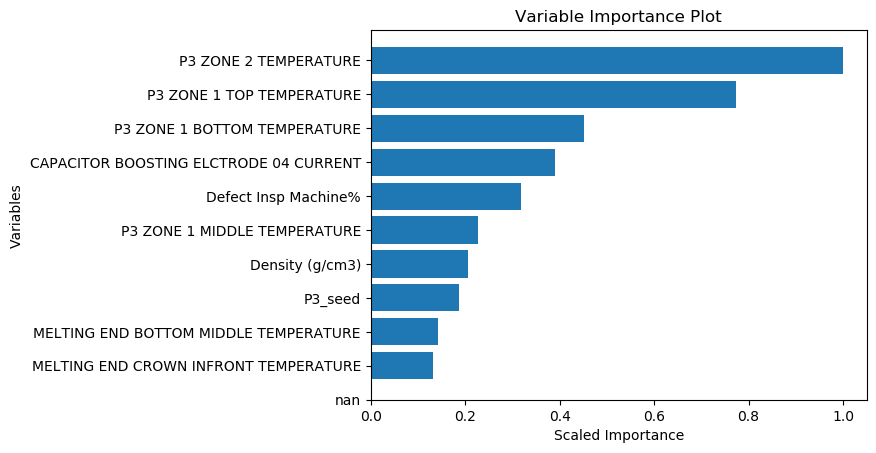

In [108]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people =list(df["Variable "])
y_pos = np.arange(len(people))
scaled_Importance = list(df["Value"])

ax.barh(y_pos, scaled_Importance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Scaled Importance')
ax.set_ylabel('Variables')
ax.set_title('Variable Importance Plot')

plt.show()
